# Decision Tree Playgolf

#### Laden der Bibliotheken

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Laden des Playgolf-Datensatzes

In [6]:
#Create the dataset
#create empty data frame
playgolf = pd.DataFrame()

#add outlook
playgolf['Outlook'] = ['rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'sunny', 
                     'overcast', 'rainy', 'rainy', 'sunny', 'rainy', 'overcast',
                     'overcast', 'sunny']
#add temperature
playgolf['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
                         'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']
#add humidity
playgolf['Humidity'] = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
                      'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high']
#add windy
playgolf['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true',
                   'false', 'false', 'false', 'true', 'true', 'false', 'true']
#finally add play
playgolf['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']

#### Beschreibung des Datensatzes

In [7]:
print(playgolf.columns)
print(playgolf.shape)
print(playgolf.head(3))

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'], dtype='object')
(14, 5)
    Outlook Temperature Humidity  Windy Play
0     rainy         hot     high  false   no
1     rainy         hot     high   true   no
2  overcast         hot     high  false  yes


#### One Hot Encoding(Dummy Encoding) der kategorialen Variablen

In [8]:
playgolf = pd.get_dummies(playgolf, columns=["Outlook","Temperature","Humidity","Windy"])

In [9]:
print(playgolf.columns)
print(playgolf.shape)
print(playgolf.head(3))

Index(['Play', 'Outlook_overcast', 'Outlook_rainy', 'Outlook_sunny',
       'Temperature_cool', 'Temperature_hot', 'Temperature_mild',
       'Humidity_high', 'Humidity_normal', 'Windy_false', 'Windy_true'],
      dtype='object')
(14, 11)
  Play  Outlook_overcast  Outlook_rainy  Outlook_sunny  Temperature_cool  \
0   no                 0              1              0                 0   
1   no                 0              1              0                 0   
2  yes                 1              0              0                 0   

   Temperature_hot  Temperature_mild  Humidity_high  Humidity_normal  \
0                1                 0              1                0   
1                1                 0              1                0   
2                1                 0              1                0   

   Windy_false  Windy_true  
0            1           0  
1            0           1  
2            1           0  


#### Selektion der Variablen

In [10]:
X = playgolf.values[:,1:11] # Features
y = playgolf.values[:,0] # Target variable

#### Split dataset into training set and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Create Decision Tree classifer object

In [12]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Train Decision Tree Classifer

In [13]:
tree = tree.fit(X_train,y_train)

#### Vorhersage

In [14]:
y_pred = tree.predict(X_test)
y_pred

array(['no', 'no', 'yes'], dtype=object)

#### Modell Güte

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


#### Baumstruktur

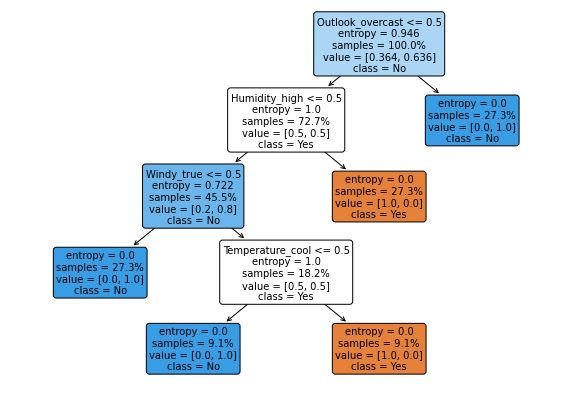

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plt_tree = plot_tree(tree, filled=True, feature_names = playgolf.columns[1:], class_names=['Yes','No'], impurity=True, proportion=True, rounded=True, fontsize=10)